# Tasks

Now, put neural networks into action. You are tasked with building a neural network using data from this [kaggle competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=sample_submission.csv). To complete the assignment, train and evaluate your model using only the train.csv.

 ### Required Task:
Be sure to perform a train test split on the train.csv so you can evaluate your models.
Create and evaluate 3 iterations of a deep learning model to predict housing prices using the techniques you have learned to optimize your model's performance. Be sure to include some form of regularization with at least one model.
Select your best model!

### Optional Task
Use your best model to make predictions using the features in test.csv.
Submit to the Kaggle competition to see how your did!
Include a screenshot of your results from the Kaggle competition inserted in a markdown cell at the bottom of your notebook.

# Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# new libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
tf.config.set_visible_devices([], 'GPU')

import warnings 
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
filename = 'https://raw.githubusercontent.com/jaytrey777/Neural-Network-Exercise/main/train.csv'
df = pd.read_csv(filename)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# PreProcessing

In [4]:
target = 'SalePrice'

X = df.drop(columns = target).copy()
y = df[target].copy()
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
def eval_regression(model, X, y, name='model'):
    score_df = pd.DataFrame(index=[name])
    preds = model.predict(X)
    score_df.loc[name,'MAE'] = mean_absolute_error(y, preds)
    score_df.loc[name,'RMSE'] = np.sqrt(mean_squared_error(y, preds))
    score_df.loc[name,'R2'] = r2_score(y, preds)
    return score_df

def plot_history(history):
    metrics = history.history.keys()
    for metric in metrics:
        if not 'val' in metric:
            plt.plot(history.history[f'{metric}'], label=f'{metric}')
            if f'val_{metric}' in metrics:
                plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.legend()
            plt.title(f'{metric}')
            plt.show()

In [6]:
def eval_regression(y_true, y_pred, name='model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [7]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

## Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head() # quick check to see features and a bit of info in the training data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.0,Gd,TA,PConc,Gd,Gd,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,437,TA,TA,Y,156,20,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,0,356,560,GasA,TA,Y,SBrkr,698,560,0,1258,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1939.0,Unf,1,280,TA,TA,P,0,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal
626,627,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1960,1978,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,978,978,GasA,TA,Y,SBrkr,1422,0,0,1422,0,0,1,0,3,1,TA,6,Min1,1,TA,Attchd,1960.0,RFn,1,286,TA,TA,Y,0,0,36,0,0,0,NaN,GdWo,Shed,600,8,2007,WD,Normal
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,243.0,TA,TA,CBlock,TA,TA,No,Rec,608,Unf,0,834,1442,GasA,Gd,Y,SBrkr,1442,0,0,1442,0,0,1,1,4,1,TA,7,Typ,0,NaN,Attchd,1958.0,RFn,1,301,TA,TA,Y,0,0,275,0,0,0,NaN,NaN,Shed,500,4,2007,COD,Normal


In [9]:
y_train.head() # repeat for target 

1023    191000
810     181000
1384    105000
626     139900
813     157900
Name: SalePrice, dtype: int64

## Numerical Columns

In [10]:
median_imputer = SimpleImputer(strategy = 'median') #imptes the median value for missing vaules
scaler = StandardScaler() #scales data

numerical_pipeline = make_pipeline(median_imputer, scaler)

numerical_selector = make_column_selector(dtype_include = "number")

numerical_tuple = (numerical_pipeline, numerical_selector)

## Categorical Columns

In [11]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False) 
constant_imputer = SimpleImputer(strategy='constant', fill_value='missing') 

categorical_pipeline = make_pipeline(constant_imputer, ohe)

categorical_selector = make_column_selector(dtype_include = "object")

categorical_tuple = (categorical_pipeline, categorical_selector)

In [12]:
preprocessor = make_column_transformer(numerical_tuple, categorical_tuple, 
                                       remainder = 'drop',
                                       verbose_feature_names_out = False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x28b48a5e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x28b48a550>)],
                  verbose_feature_names_out=False)

## Fit the Data to Preprocessor

In [13]:
X_train = preprocessor.fit_transform(X_train) # apply the preprocessor
X_test = preprocessor.transform(X_test)

# 1st Model 

In [14]:
# RELU Activation, 5 layers,  20% drop in number of neurons per layer

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

reg_model = Sequential()

inputs = X_train.shape[1]

# Hidden Layers
reg_model.add(Dense(inputs, activation='relu', input_dim = inputs, name = 'h1'))
reg_model.add(Dense(inputs * 0.8, activation='relu', name='h2'))
reg_model.add(Dense(inputs * 0.6, activation='relu', name='h3'))
reg_model.add(Dense(inputs * 0.4, activation='relu', name='h4'))
reg_model.add(Dense(inputs * 0.2, activation='relu', name='h5'))

# Output Layer
reg_model.add(Dense(1, activation='linear', name ='output'))


# Summary
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 301)               90902     
                                                                 
 h2 (Dense)                  (None, 240)               72480     
                                                                 
 h3 (Dense)                  (None, 180)               43380     
                                                                 
 h4 (Dense)                  (None, 120)               21720     
                                                                 
 h5 (Dense)                  (None, 60)                7260      
                                                                 
 output (Dense)              (None, 1)                 61        
                                                                 
Total params: 235,803
Trainable params: 235,803
Non-trai

In [15]:
rmse = RootMeanSquaredError(name="rmse")
reg_model.compile(optimizer= "adam", loss = "mse", 
                  metrics = [metrics.MeanAbsoluteError(),
                  metrics.RootMeanSquaredError()])

In [16]:
history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,
                        verbose = 0)


2023-05-11 10:40:24.824580: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-11 10:40:25.289677: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x28cc76d10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-11 10:40:25.289692: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-05-11 10:40:25.294073: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-11 10:40:25.311774: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


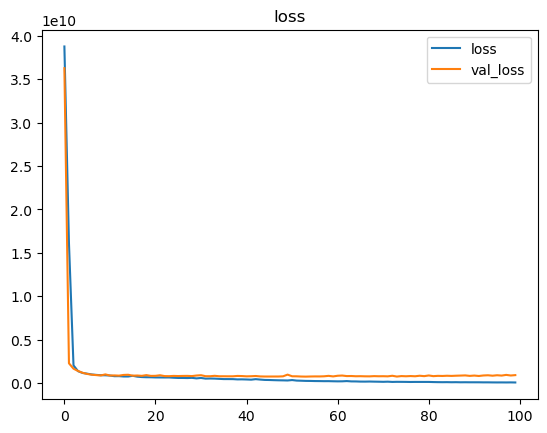

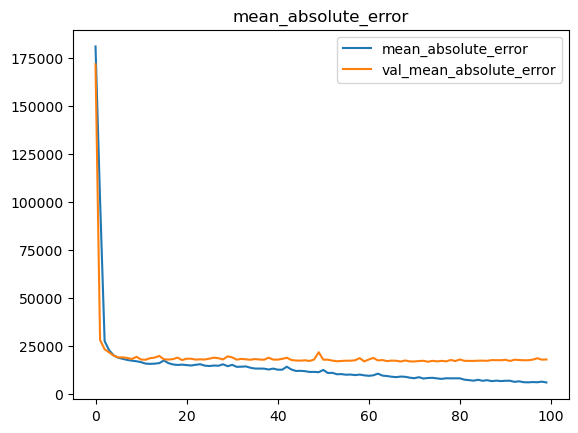

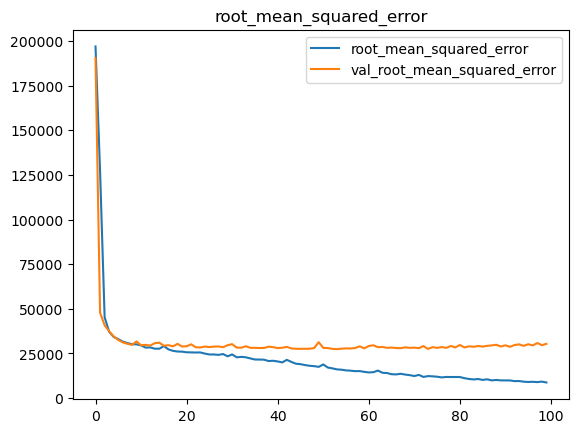

In [17]:
plot_history(history)

In [18]:
y_pred = reg_model.predict(X_test)

12/12 [==============================] - 0s 764us/step


In [19]:
eval_regression(y_test, y_pred, name="reg_model")

reg_model Scores
MAE: 17,969.0762 
MSE: 923,592,265.5550 
RMSE: 30,390.6608 
R2: 0.8682



# 2nd Model

In [20]:
# RELU, 5 Layers, 20% Drop in Neurons per Layer and 20% Dropout Regularization

reg_model2 = Sequential()

inputs = X_train.shape[1]

# Hidden Layers
reg_model2.add(Dense(inputs, activation='relu', input_dim = inputs, name = 'h1'))
reg_model2.add(Dense(inputs * 0.8, activation='relu', name='h2'))
reg_model2.add(Dense(inputs * 0.6, activation='relu', name='h3'))
reg_model2.add(Dense(inputs * 0.4, activation='relu', name='h4'))
reg_model2.add(Dense(inputs * 0.2, activation='relu', name='h5'))

# Dropout Layer
reg_model2.add(Dropout(0.2))

# Output Layer
reg_model2.add(Dense(1, activation='linear', name ='output'))

# Summary 
reg_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 301)               90902     
                                                                 
 h2 (Dense)                  (None, 240)               72480     
                                                                 
 h3 (Dense)                  (None, 180)               43380     
                                                                 
 h4 (Dense)                  (None, 120)               21720     
                                                                 
 h5 (Dense)                  (None, 60)                7260      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 output (Dense)              (None, 1)                

In [21]:
#Compile the model
rmse = RootMeanSquaredError(name="rmse")
reg_model2.compile(optimizer= "adam", loss = "mse", 
                  metrics = [metrics.MeanAbsoluteError(),
                  metrics.RootMeanSquaredError()])

In [22]:
history2 = reg_model2.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,
                        verbose = 0)

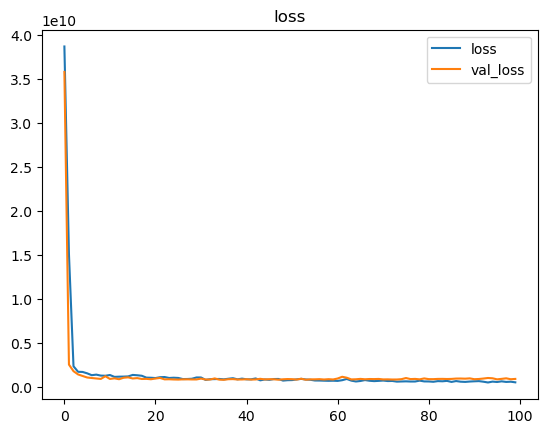

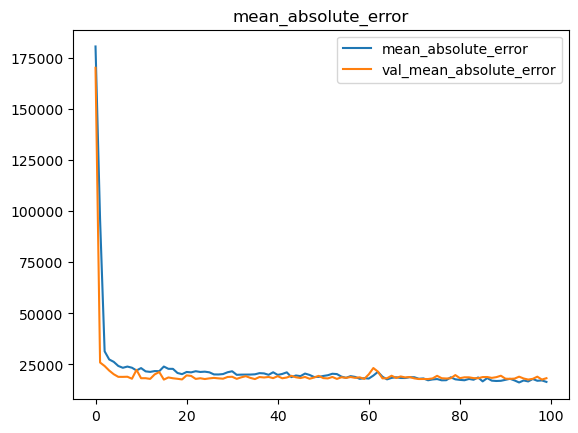

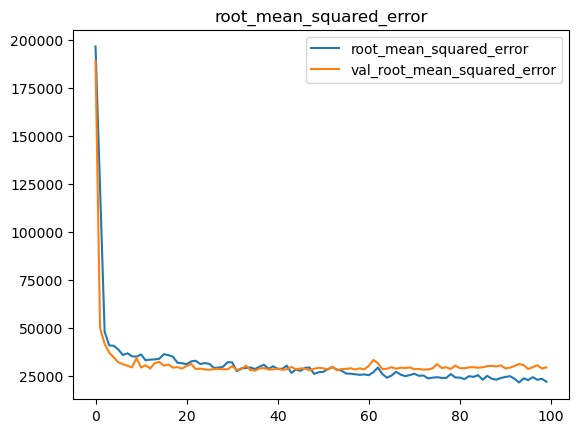

In [23]:
plot_history(history2)

In [24]:
eval_regression(y_test, y_pred, name="reg_model2")

reg_model2 Scores
MAE: 17,969.0762 
MSE: 923,592,265.5550 
RMSE: 30,390.6608 
R2: 0.8682



# 3rd Model

In [25]:
# RELU, 20 Layers, 5% Drop in Neurons per Layer

reg_model3 = Sequential()

inputs = X_train.shape[1]

# Hidden Layers
reg_model3.add(Dense(inputs, activation='relu', input_dim = inputs, name = 'h1'))
reg_model3.add(Dense(inputs * 0.95, activation='relu', name='h2'))
reg_model3.add(Dense(inputs * 0.9, activation='relu', name='h3'))
reg_model3.add(Dense(inputs * 0.85, activation='relu', name='h4'))
reg_model3.add(Dense(inputs * 0.8, activation='relu', name='h5'))
reg_model3.add(Dense(inputs * 0.75, activation='relu', name='h6'))
reg_model3.add(Dense(inputs * 0.7, activation='relu', name='h7'))
reg_model3.add(Dense(inputs * 0.65, activation='relu', name='h8'))
reg_model3.add(Dense(inputs * 0.6, activation='relu', name='h9'))
reg_model3.add(Dense(inputs * 0.55, activation='relu', name='h10'))
reg_model3.add(Dense(inputs * 0.5, activation='relu', name='h11'))
reg_model3.add(Dense(inputs * 0.45, activation='relu', name='h12'))
reg_model3.add(Dense(inputs * 0.4, activation='relu', name='h13'))
reg_model3.add(Dense(inputs * 0.35, activation='relu', name='h14'))
reg_model3.add(Dense(inputs * 0.3, activation='relu', name='h15'))
reg_model3.add(Dense(inputs * 0.25, activation='relu', name='h16'))
reg_model3.add(Dense(inputs * 0.2, activation='relu', name='h17'))
reg_model3.add(Dense(inputs * 0.15, activation='relu', name='h18'))
reg_model3.add(Dense(inputs * 0.1, activation='relu', name='h19'))
reg_model3.add(Dense(inputs * 0.05, activation='relu', name='h20'))

# Output Layer
reg_model3.add(Dense(1, activation='linear', name ='output'))

# Summary 
reg_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 301)               90902     
                                                                 
 h2 (Dense)                  (None, 285)               86070     
                                                                 
 h3 (Dense)                  (None, 270)               77220     
                                                                 
 h4 (Dense)                  (None, 255)               69105     
                                                                 
 h5 (Dense)                  (None, 240)               61440     
                                                                 
 h6 (Dense)                  (None, 225)               54225     
                                                                 
 h7 (Dense)                  (None, 210)              

In [26]:
#Compile the model
rmse = RootMeanSquaredError(name="rmse")
reg_model3.compile(optimizer= "adam", loss = "mse", 
                  metrics = [metrics.MeanAbsoluteError(),
                  metrics.RootMeanSquaredError()])

In [27]:
history3 = reg_model3.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,
                        verbose = False)

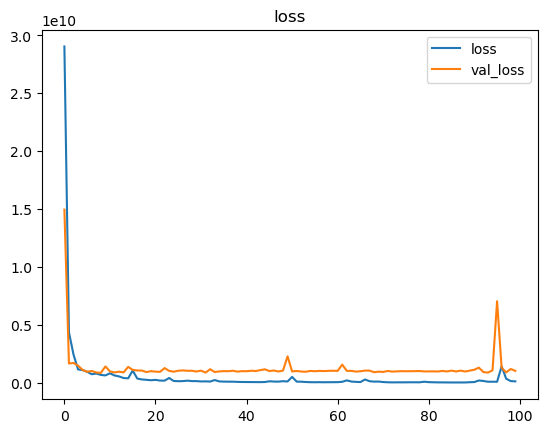

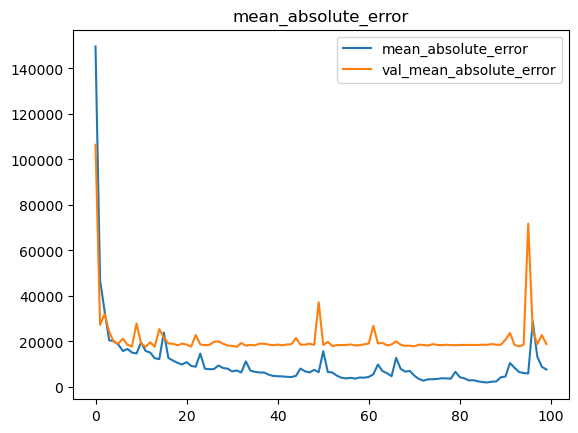

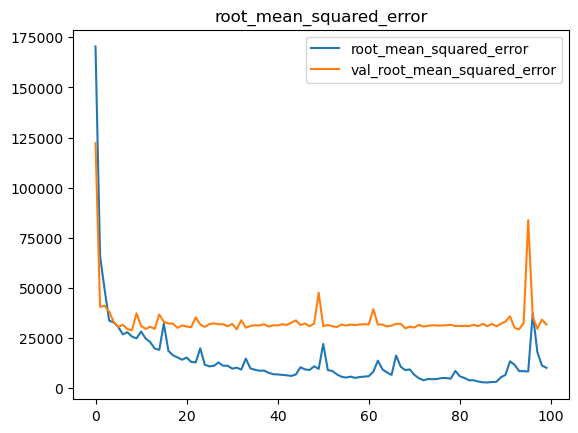

In [28]:
plot_history(history3)

In [29]:
eval_regression(y_test, y_pred, name="reg_model3")

reg_model3 Scores
MAE: 17,969.0762 
MSE: 923,592,265.5550 
RMSE: 30,390.6608 
R2: 0.8682

